In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import os
import calendar as ca

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


# Cập nhật dữ liệu bán hàng 12 tháng năm 2019 và tạo bảng tổng hợp dữ liệu all_data

In [2]:
files = [file for file in os.listdir('C:\\Users\\ThinkPad\Downloads\Hithub data\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data')]
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
data = pd.DataFrame()

for file in files:
    df = pd.read_csv('C:\\Users\\ThinkPad\Downloads\Hithub data\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data/' + file)
    data = pd.concat([data,df])
data.to_csv('data.csv', index = False)

In [4]:
all_data = pd.read_csv("data.csv")

# Làm sạch dữ liệu

In [5]:
#loaị bỏ giá trị trống
all_data = all_data.dropna(how= 'any')

In [6]:
#Kiểm tra
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
#khi nối các bảng excel thành một bảng thống nhất, các heading của các bảng sau sẽ trở thành cách row trong bảng tổng hợp
all_data[all_data['Order Date'].str.contains('Or')]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
#kiem tra
all_data = all_data[all_data['Order Date'].str.contains('Or') == False]

In [10]:
#thay đổi kiểu dữ liệu của cột Month
all_data['Month'] = all_data['Order Date'].str[0:2].astype(int)
all_data.reindex()
             

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [11]:
#tạo cột Sale chứa doanh thu bán hàng
all_data["Sale"] = pd.to_numeric(all_data['Quantity Ordered']) * pd.to_numeric(all_data["Price Each"])

In [12]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  object 
 3   Price Each        185950 non-null  object 
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
 7   Sale              185950 non-null  float64
dtypes: float64(1), int32(1), object(6)
memory usage: 12.1+ MB


In [13]:
#tạo bảng tổng doanh thu theo tháng
months_sale = all_data.groupby("Month").sum()
months_sale

,Sale
Month,
1,1.822257e+06
2,2.202022e+06
3,2.807100e+06
4,3.390670e+06
5,3.152607e+06
6,2.577802e+06
7,2.647776e+06
8,2.244468e+06
9,2.097560e+06


Text(0, 0.5, 'Sale')

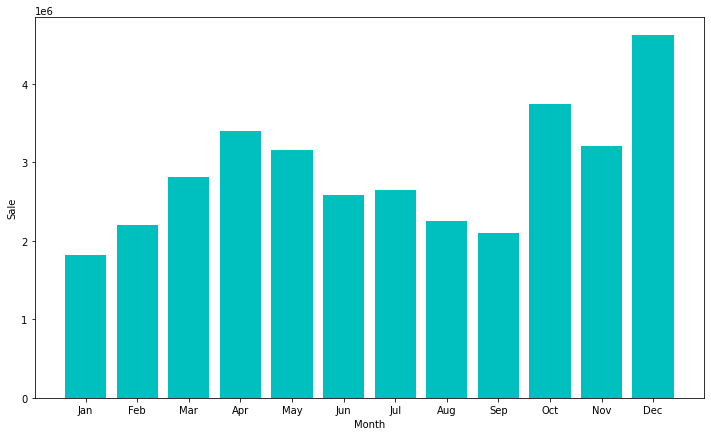

In [14]:
#tạo biểu đồ cột
import calendar
months = []
for month in range(1, 13):
    months = months + [calendar.month_abbr[month]]
plt.figure(figsize =(12,7))
plt.bar(months, months_sale["Sale"], color = "c")
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Sale")

Doanh thu bán hàng lớn nhất vào tháng 12

In [15]:
# phần trăm đóng góp doanh thu của quý 4 năm 2019
months_sale[9:12].sum()/months_sale.sum()

Sale    0.334853
dtype: float64

vậy quý 4 chiếm 33,4% TỔNG doanh thu cả năm, điều này là dễ hiểu khi mà ở Mỹ, các dịp lễ lớn tập trung nhiều vào 3 tháng cuối của năm

In [17]:
#tạo cột City chưa tên thành phố của người mua hàng
def get_state(address):
    return address.split(",")[2]
all_data["City"] = all_data["Purchase Address"].apply(lambda x: x.split(',')[1] +" (" + get_state(x).split(' ')[1] + ")")
all_data["City"].head(5)

0          Dallas (TX)
2          Boston (MA)
3     Los Angeles (CA)
4     Los Angeles (CA)
5     Los Angeles (CA)
Name: City, dtype: object

Text(0.5, 1.0, 'Bieu Do Doanh Thu Theo Thanh Pho')

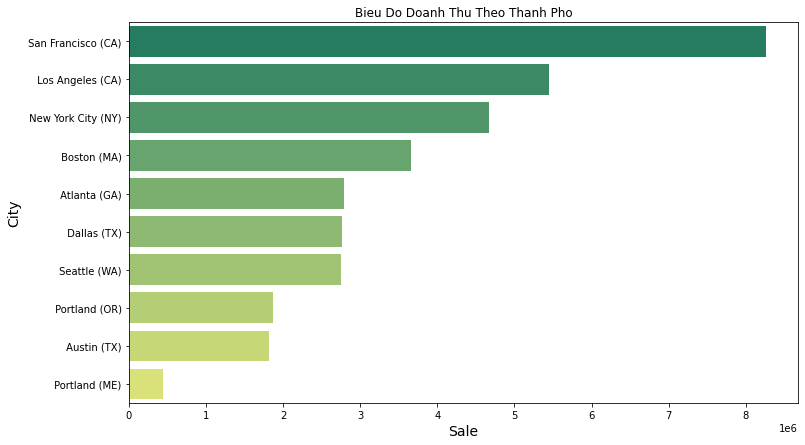

In [18]:
import seaborn as sns
city_sale = all_data.groupby('City').sum().reset_index().sort_values('Sale', ascending = False)
cities = city_sale["City"]

plt.figure(figsize = (12,7))
sns.barplot(y = cities, x = city_sale["Sale"], palette = "summer", linewidth =2)
plt.xticks(rotation = "horizontal")
plt.xlabel("Sale", size = 14)
plt.ylabel("City", size  = 14)
plt.title("Bieu Do Doanh Thu Theo Thanh Pho")

Khách hàng tại San Francisco bỏ nhiều tiền nhất cho việc mua sắm, trong khi đó Portland lại thấp nhất trong tất cả các địa điểm.

In [19]:
all_data["Price Each"] = all_data["Price Each"].astype(float)
all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype(int)

# Phân tích sản phẩm

In [ ]:
#Tìm ra sản phẩm được mua kềm nhiều nhất với Google Phone
#tạo bản tổng hợp sản phẩm được mua và sản phẩm đi kèm

df = all_data[all_data["Order ID"].duplicated(keep =False)]
df["Group"] = df.groupby("Order ID")["Product"].transform(lambda x:",".join(x))
df = df[["Product","Group"]].drop_duplicates()

def calculation(val):
    v_dup = val[1] +","
    v_group = val[0] + ","
    return v_group.replace(v_dup,'',1).strip()
df["Group"] = df[["Group","Product"]].apply(calculation, axis=1)

for a in np.arange(2):
    df["Product%s" %(a)] = df["Group"].apply(lambda x: x.split(",")[a] if a < len(x.split(",")) else " " )
df.pop("Group")
df

In [21]:
#danh sach cac san pham duoc mua kem voi GG phone
def delete_space(val):
    if val == "":
        return np.nan
    else:
        return val
df["Product0"] = df["Product0"].apply(delete_space)
df["Product1"] = df["Product1"].apply(delete_space)

In [23]:
df_product = df[df["Product"] == "Google Phone"]
df_product = df_product[["Product0","Product1"]].apply(pd.Series.value_counts).sum(axis=1)

In [24]:
df_product.sort_values(ascending = False)

USB-C Charging Cable          21.0
Wired Headphones              13.0
Bose SoundSport Headphones     9.0
Lightning Charging Cable       6.0
iPhone                         4.0
27in FHD Monitor               4.0
AA Batteries (4-pack)          4.0
Apple Airpods Headphones       4.0
AAA Batteries (4-pack)         3.0
Macbook Pro Laptop             3.0
Vareebadd Phone                2.0
ThinkPad Laptop                2.0
20in Monitor                   2.0
27in 4K Gaming Monitor         2.0
Flatscreen TV                  2.0
34in Ultrawide Monitor         2.0
LG Washing Machine             1.0
LG Dryer                       1.0
Google Phone                   1.0
dtype: float64

Vạy USB-C Charging Cable là sản phẩm được mua kèm nhiều nhất khi khách hàng mua Google Phone

In [25]:
#phân loại dữ liệu liên quan giá và sản lượng bán
product_group = all_data.groupby("Product")
prices = product_group.mean()["Price Each"]
products = [product for product, df in all_data.groupby("Product")]
quantity_ordered = product_group.sum()['Quantity Ordered']
total_sale = product_group.sum()["Sale"]

C:\Users\ThinkPad\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


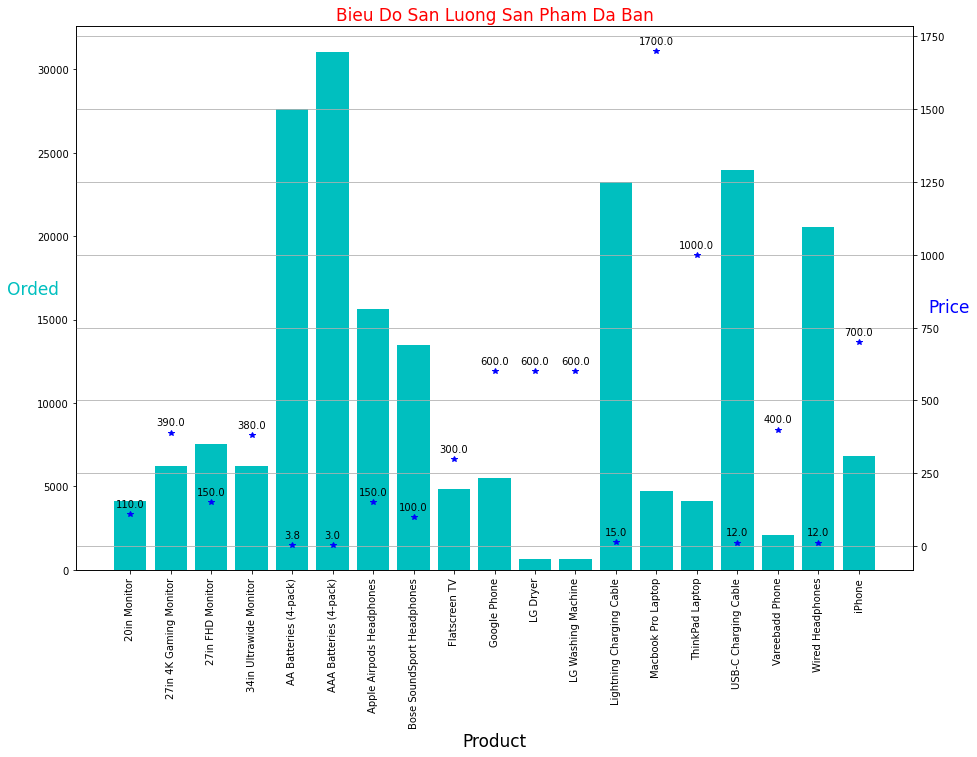

In [26]:
#tổng quan sản lượng bán ra và giá của từng loại sản phẩm
fig, ax1 = plt.subplots(figsize = (15,10))

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = "c")
ax2.plot(products, prices, 'b*', ds = 'steps-mid')

ax1.set_xlabel('Product', size = 17)
ax1.set_ylabel('Orded', color='c', size = 17, rotation = 'horizontal')
ax2.set_ylabel('Price', color='b', size = 17, rotation = 'horizontal')
ax1.set_xticklabels(products, rotation = "vertical")


line = ax2.lines[0]
for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.1f}".format(y_value)
            ax2.annotate(label,(x_value, y_value), xytext=(0,5), 
                textcoords="offset points", ha='center', va='bottom')   

plt.title("Bieu Do San Luong San Pham Da Ban", color = "r", size = 17)
plt.grid(True)
plt.show()

C:\Users\ThinkPad\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


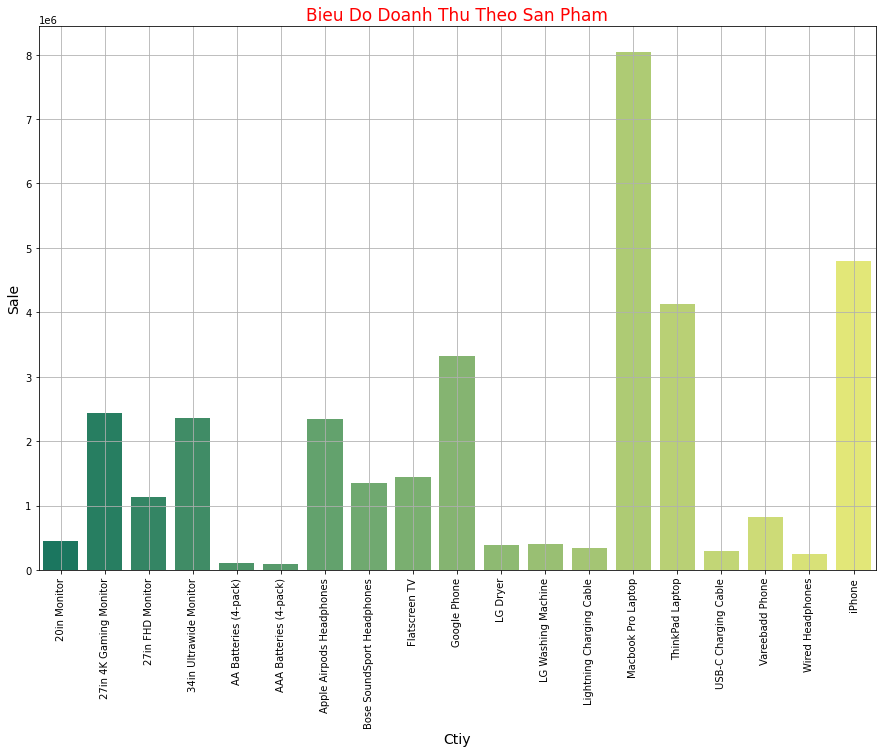

In [27]:
#Tạo biểu đồ doanh thu theo sản phẩm
plt.figure(figsize = (15,10))
sns.barplot(products, total_sale, palette = "summer")
plt.xticks(rotation = "vertical")
plt.xlabel("Ctiy", size = 14)
plt.ylabel("Sale", size  = 14)
plt.title("Bieu Do Doanh Thu Theo San Pham", size = 17, color = "r")
plt.grid(True)
plt.show()

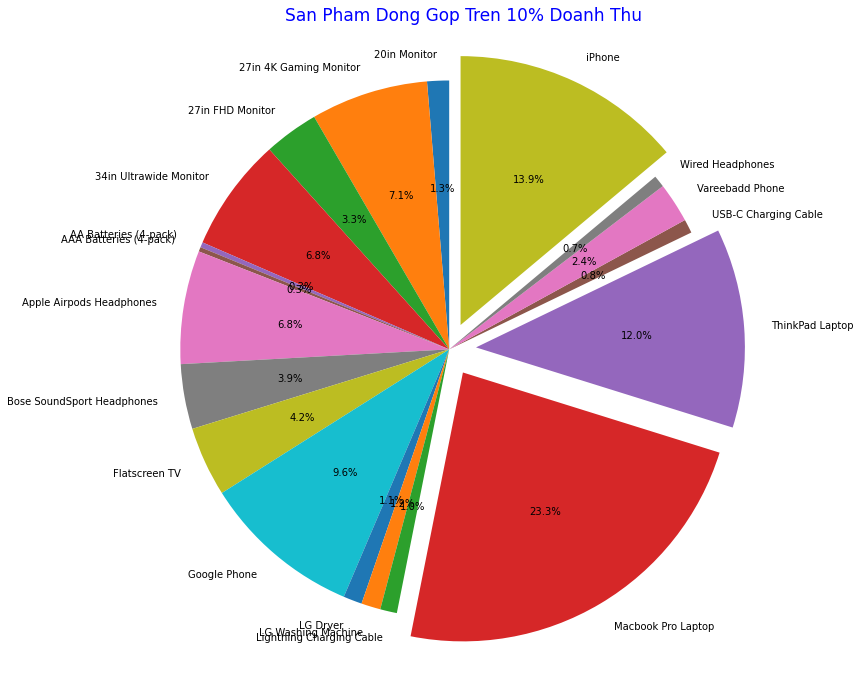

In [28]:
# tìm kiếm các sản phẩm đóng góp quan trọng vào doanh thu
per_sale = product_group.agg({"Sale":"sum"})
per = per_sale["Sale"].apply(lambda x: 100* x / per_sale["Sale"].sum())
explode = per.apply(lambda x: 0.1 if x > 10 else 0)
fig1, ax1 = plt.subplots(figsize = (12,12))
ax1.pie(per,explode = explode, autopct='%1.1f%%',labels = products,
        shadow=False, startangle=90, radius = 1)
ax1.axis('equal')
plt.title("San Pham Dong Gop Tren 10% Doanh Thu", color = "b", size = 17)
plt.show()